In [1]:
# importing all necessary packages/Libraries:
import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Now we can read the File by using pandas liberabry:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
GlassData = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv" , names = Headers)

In [4]:
GlassData.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Exploring Dataset
1.Shape of dataset
2.Count of Null values


In [5]:
GlassData.shape


(214, 10)

In [6]:
GlassData.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

To describe the statistics of the database we have:


In [11]:
GlassData.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


where RI is refractive index, Na is Sodium, Mg is Magnesium, Al is Aluminum, Si is Silicon, K is Potassium, Ca is Calcium, Ba is Barium, and Fe is Iron. Type would present the 6 different types of glass in the database including: 1) float processed building windows, 2) non float processed building windows, 3) float processed vehicle windows, 5) containers, 6) tableware, 7) headlamps.

# Checking outlies through Z-score

In [16]:
from scipy import stats

z = abs(stats.zscore(GlassData))

#np.where(z > 3)

GlassData = GlassData[(z < 3).all(axis=1)]

#GlassData.shape

# Separating Features and Label

In [22]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = GlassData[features]

y = GlassData[label]

In [23]:
X.shape


(175, 9)

In [24]:
type(X)


pandas.core.frame.DataFrame

# Data Visualization

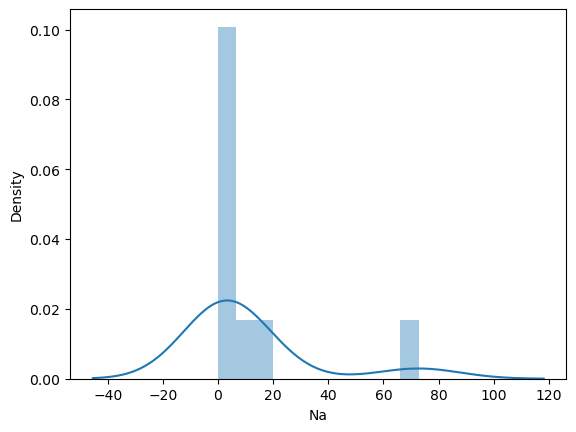

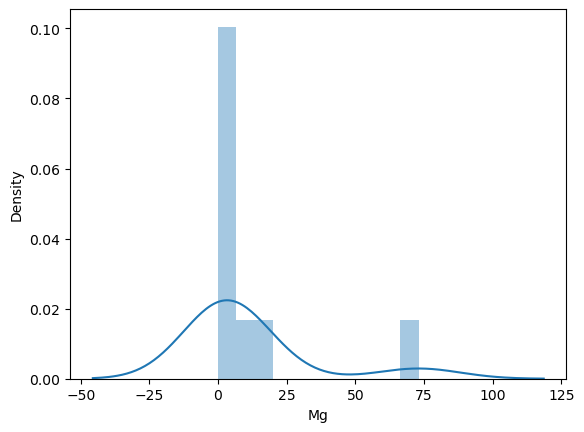

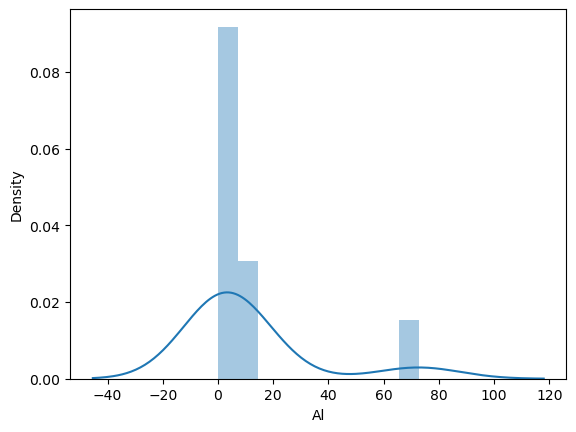

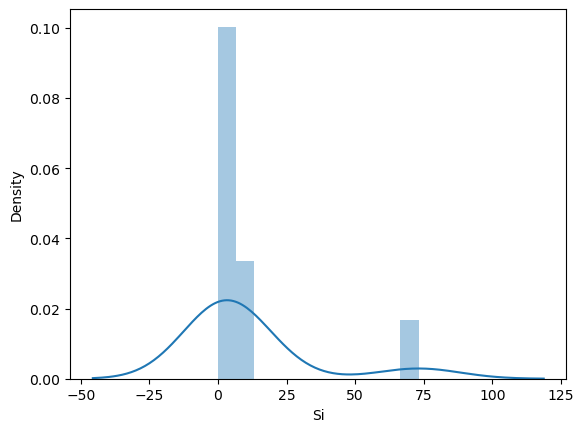

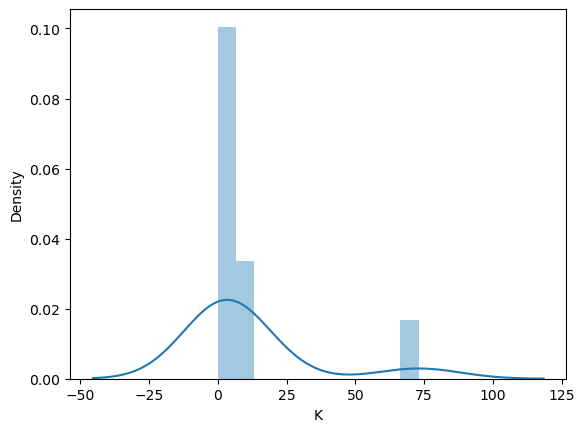

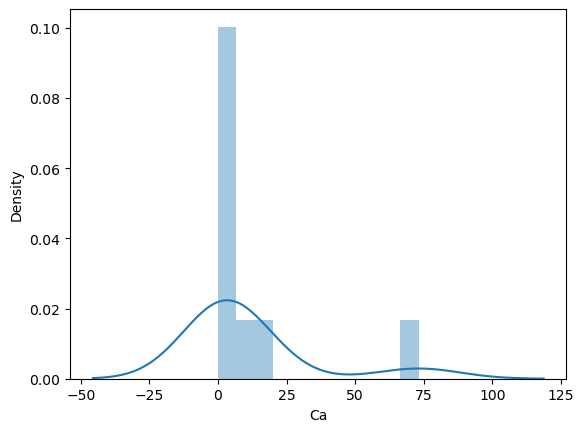

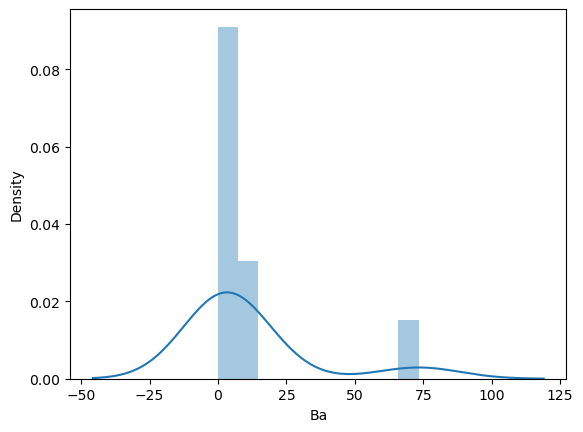

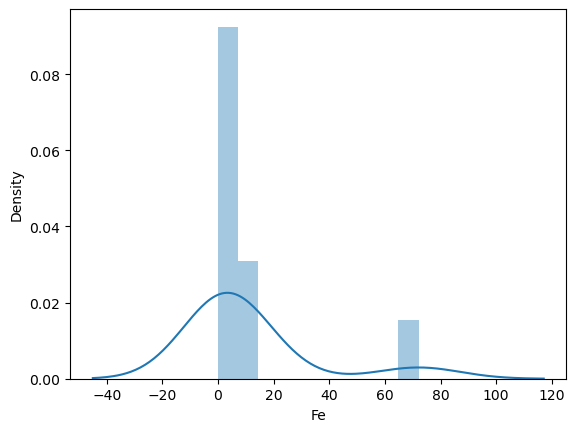

In [25]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

<Figure size 800x800 with 0 Axes>

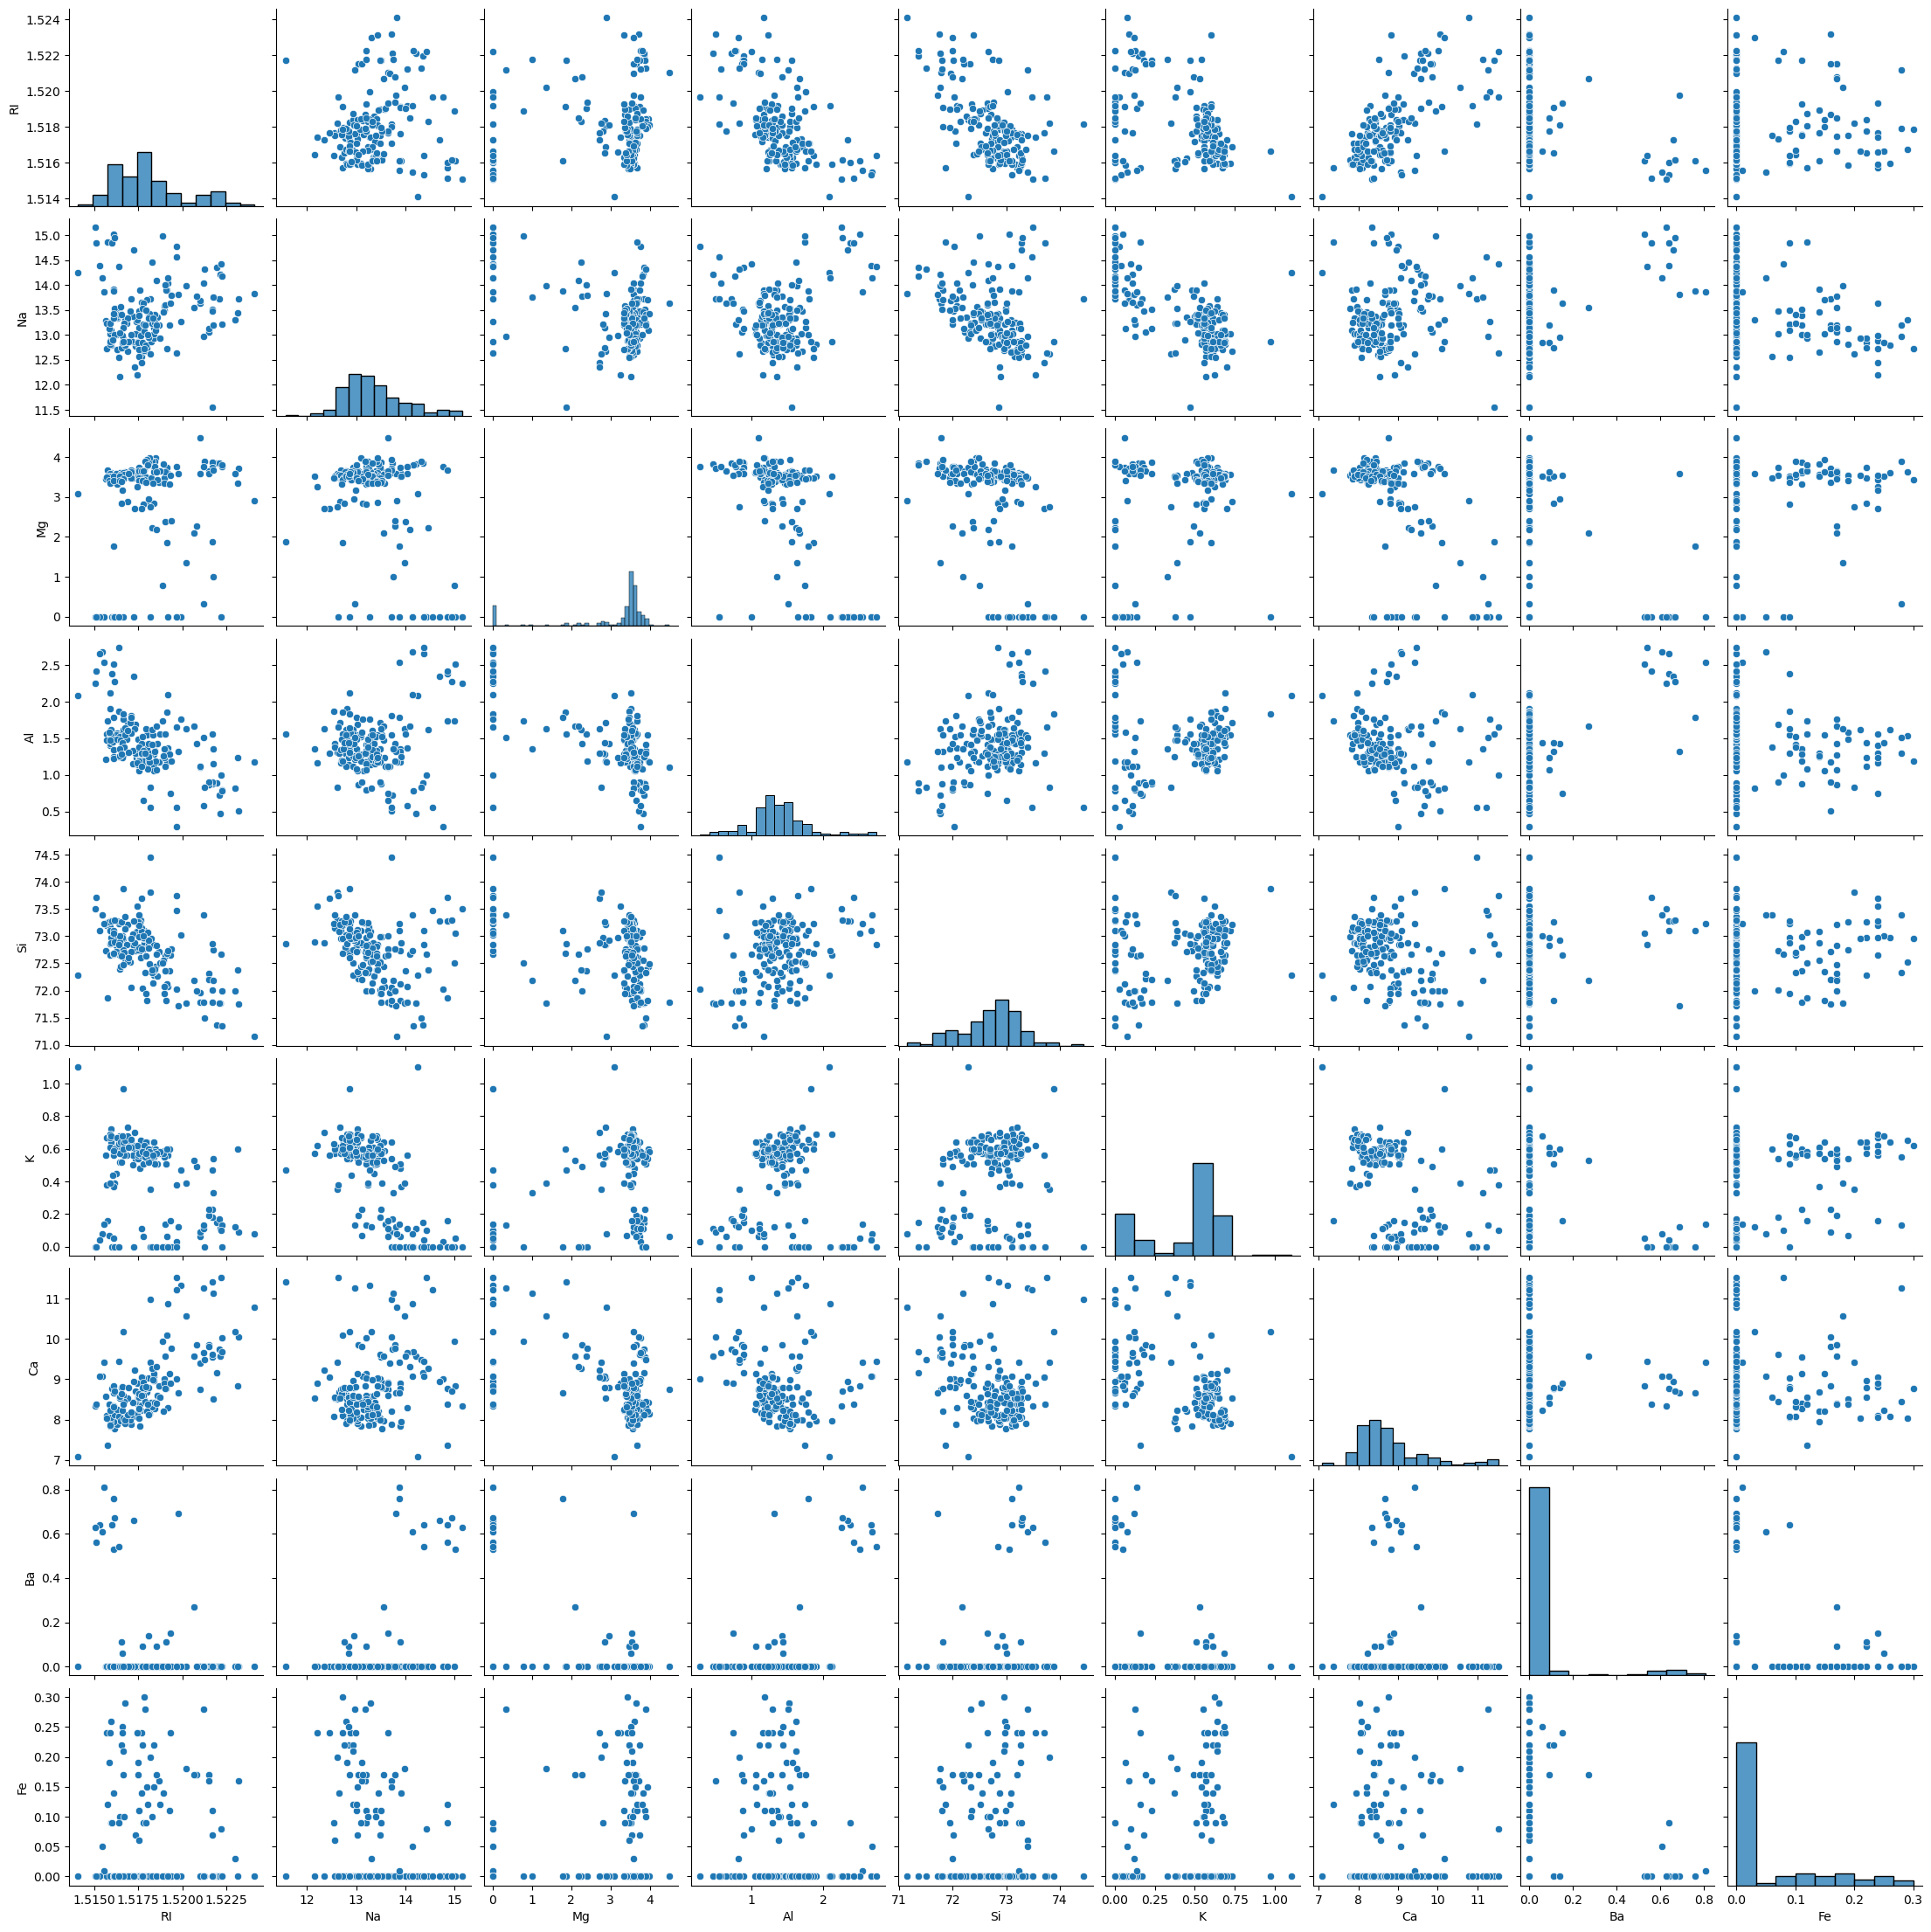

In [26]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

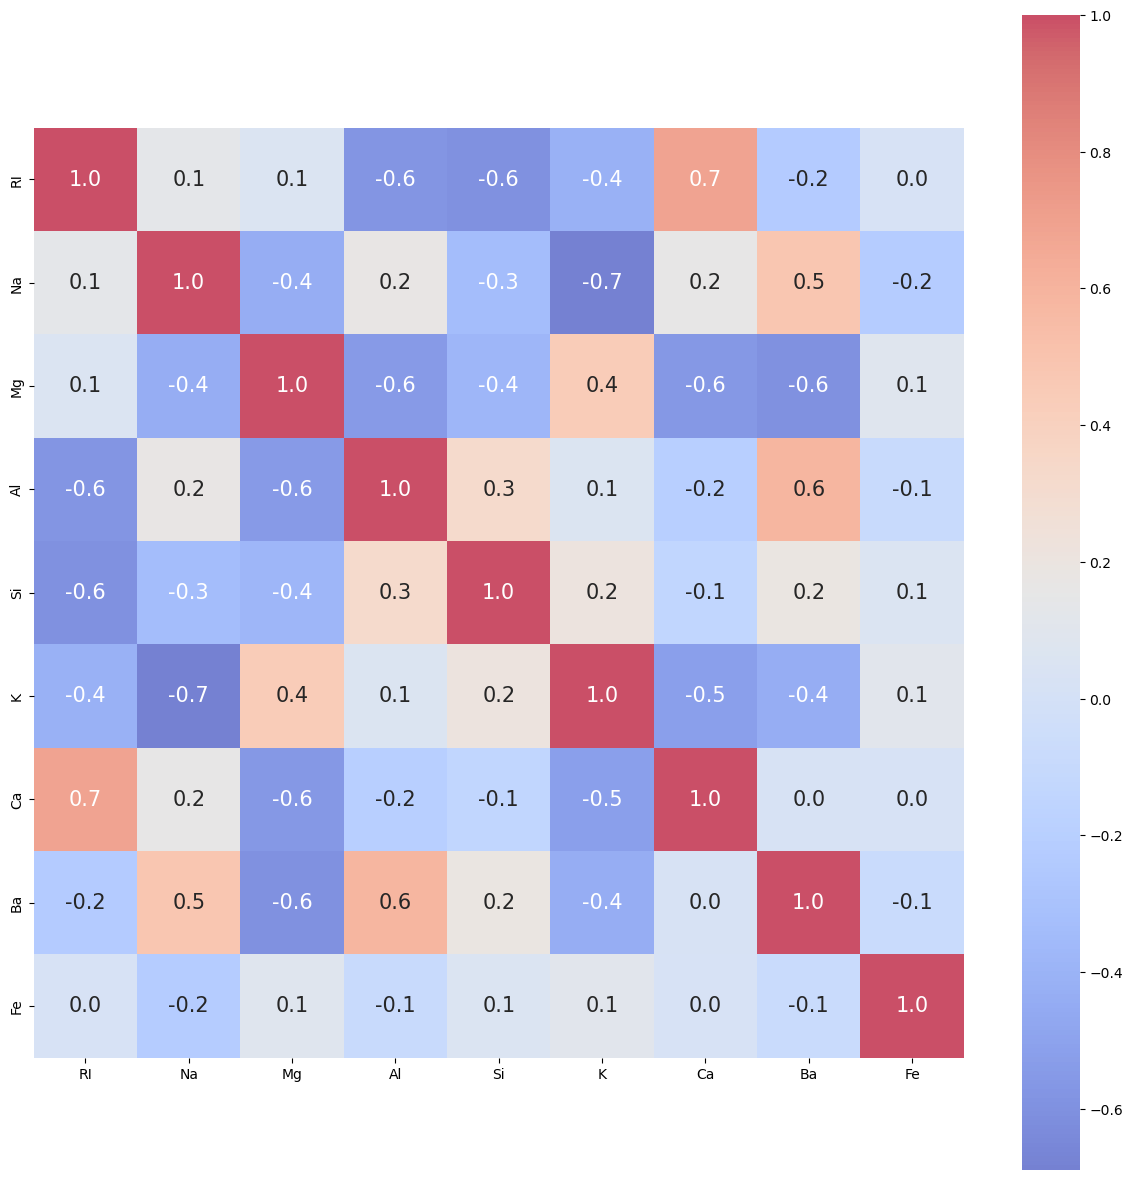

In [27]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

Our Diagram shows correaltion between different features Conclusion:

RI and Ca have strong correlation between each other
AI and ba have intermediate correlation between each other

# Scalling the data (1-0 range)

In [30]:
# normalizing/Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

In [31]:
X.head(2)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [32]:
y.head(2)


,Type
1,1
2,1


# Scalling the features

In [33]:
from sklearn import preprocessing
X=preprocessing.scale(X)

# Visualizing Data after Preprocessing

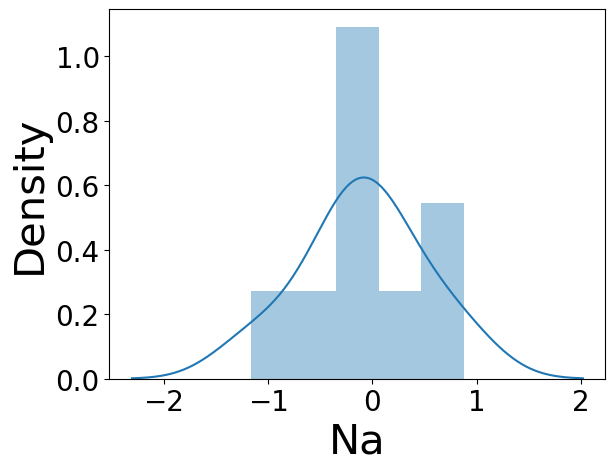

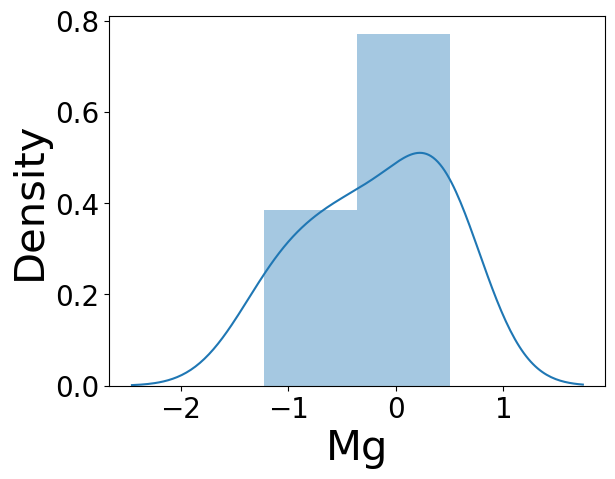

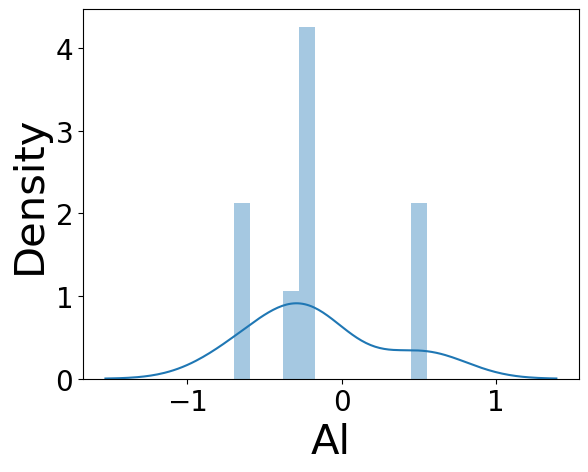

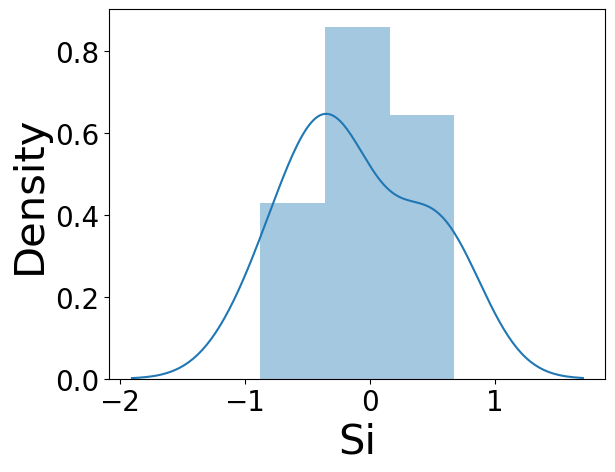

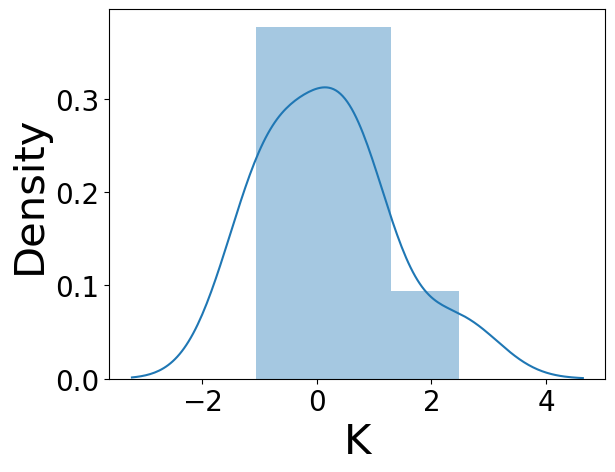

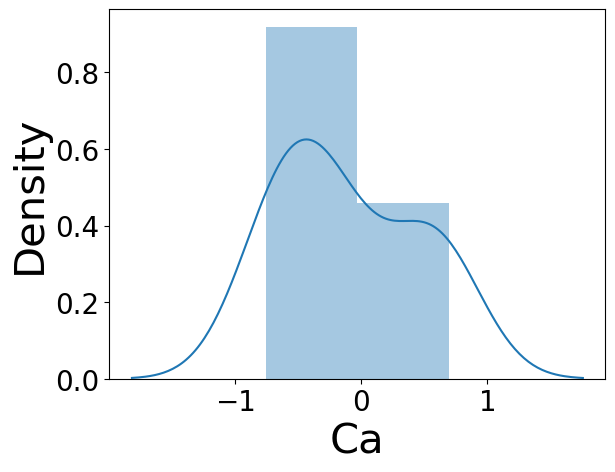

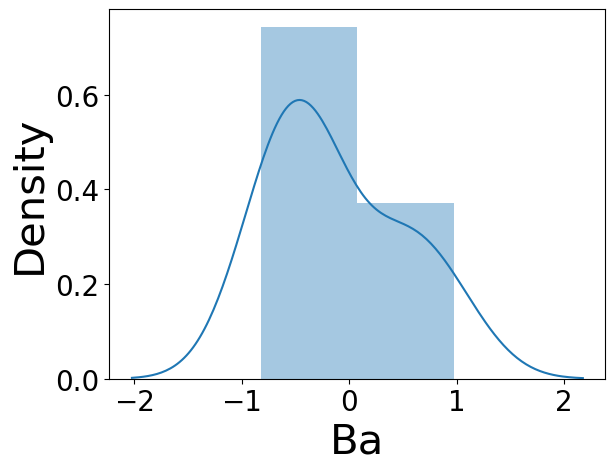

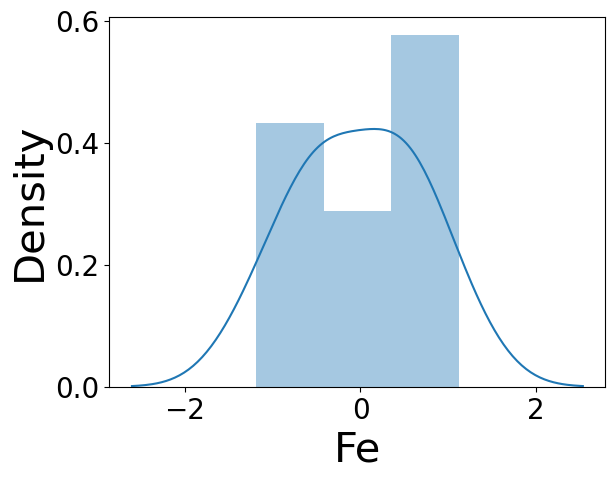

In [34]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

Above diagrams show that after preprocessing skewness is reduced, and data is more normalized


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)


In [37]:
# Flattening the array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [38]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (131, 9)
Shape of X_test = (44, 9)
Shape of y_train = (131,)
Shape of y_test = (44,)


# Applying Different Machine learning Models

# 1.KNN

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.7251908396946565
[0.6136363636363636, 0.7045454545454546, 0.7272727272727273, 0.7045454545454546, 0.6590909090909091, 0.6818181818181818, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364]


# 2.Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.6363636363636364]


# 3.Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.7175572519083969
[0.5909090909090909]


# 4.SVC Classifier (Non-Linear Kernal)

In [42]:
from sklearn.svm import SVC

Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7633587786259542
[0.6818181818181818]


# 5.SVC Classifier (Linear Kernal)

In [43]:
from sklearn.svm import LinearSVC

Scores = []

for i in range(1):
    svc = LinearSVC(random_state=0)
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)

0.7557251908396947
[0.6590909090909091]


# 6.Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

Scores = []
Range = [10,20,30,50,70,80,100,120]

for i in range(1):
    forest = RandomForestClassifier(criterion='gini', n_estimators=10, min_samples_leaf=1, min_samples_split=4, random_state=1,n_jobs=-1)
    #forest = RandomForestClassifier(n_estimators=i ,random_state=0)
    forest.fit(X_train, y_train)
    score = forest.score(X_test,y_test)
    #Scores.append(score)

print(forest.score(X_train,y_train))
print(score)

0.9847328244274809
0.75


# 7.Neural Network

In [45]:
from sklearn.neural_network import MLPClassifier

Scores = []

for i in range(1):
    NN = MLPClassifier(random_state=0)
    NN.fit(X_train, y_train)
    score = NN.score(X_test,y_test)
    Scores.append(score)

print(NN.score(X_train,y_train))
print(Scores)

0.8244274809160306
[0.6136363636363636]


# 8.Gradient Decent Tree Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gd = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gd.fit(X_train, y_train)
score = gd.score(X_test,y_test)

print(gd.score(X_train,y_train))
print(score)

0.9847328244274809
0.75


# Summary
Out of all above models:
Randorm forest is giving best result with:

training accuracy: 0.9793103448275862
test accuracy: 0.7755102040816326
But since it is overfitting we will choose next best model that is:
SVM (Non Linear Kernal)

training accuracy: 0.7586206896551724
testing accuracy: 0.7551020408163265